### *Imports*

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### *Get Data*

In [196]:
df = pd.read_excel("../input/productos-consumo-masivo/output - Kaggle.xlsx", decimal=',')

In [197]:
df.shape

(25638, 13)

In [198]:
df.columns

Index(['date', 'prod_id', 'prod_name', 'prod_name_long', 'prod_brand',
       'category', 'subcategory', 'tags', 'prod_unit_price', 'prod_units',
       'prod_icon', 'prod_source', 'source_type'],
      dtype='object')

In [199]:
df.head()

,date,prod_id,prod_name,prod_name_long,prod_brand,category,subcategory,tags,prod_unit_price,prod_units,prod_icon,prod_source,source_type
0,20190609,7702155021451,Limpia tapicería en espuma Binner,Limpia tapicería en espuma Binner x 400ml,BINNER,Supermercado,Aseo de hogar,Alfombras,15590.0,Unidades,../icons/SVG/53-places/home-3.svg,VERDE,1
1,20190609,7702155016457,Limpia tapicería y alfombras Binner,Limpia tapicería y alfombras Binner x 500ml,BINNER,Supermercado,Aseo de hogar,Alfombras,13993.0,Unidades,../icons/SVG/53-places/home-3.svg,VERDE,1
2,20190609,4008455446318,Limpiador Dr. Beckmann alfombras 2en1 poder oxi,Limpiador Dr. Beckmann alfombras 2en1 poder ox...,DR.BECKMANN,Supermercado,Aseo de hogar,Alfombras,16513.0,Unidades,../icons/SVG/53-places/home-3.svg,VERDE,1
3,20190609,7702532312677,Aceite Bon Aire eléctrico perfume flores,Aceite Bon Aire eléctrico perfume flores x 25 ml,BONAIRE,Supermercado,Aseo de hogar,Ambientadores,14990.0,Unidades,../icons/SVG/58-beauty-spas/spa-vapor.svg,VERDE,1
4,20190609,7702532312967,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,BONAIRE,Supermercado,Aseo de hogar,Ambientadores,34990.0,Unidades,../icons/SVG/58-beauty-spas/spa-vapor.svg,VERDE,1


In [200]:
df.dtypes

date                 int64
prod_id              int64
prod_name           object
prod_name_long      object
prod_brand          object
category            object
subcategory         object
tags                object
prod_unit_price    float64
prod_units          object
prod_icon           object
prod_source         object
source_type          int64
dtype: object

In [201]:
df.describe()

,date,prod_id,prod_unit_price,source_type
count,2.563800e+04,2.563800e+04,25633.000000,25638.0
mean,2.019279e+07,7.137052e+12,16180.033485,1.0
std,3.867261e+03,1.872051e+12,39862.123156,0.0
min,2.019061e+07,5.244812e+06,0.000000,1.0
25%,2.019061e+07,7.702010e+12,4190.000000,1.0
50%,2.019071e+07,7.702177e+12,7390.000000,1.0
75%,2.019110e+07,7.703616e+12,13990.000000,1.0
max,2.020022e+07,9.333527e+12,990000.000000,1.0


# *1. Data Preparation*

Let's eliminate the column of icons, since it is not useful for this analysis.

In [202]:
df = df[['date', 
         'prod_id', 
         'prod_name', 
         'prod_name_long', 
         'prod_brand',
         'category', 
         'subcategory', 
         'tags', 
         'prod_unit_price', 
         'prod_units',
         # 'prod_icon', 
         # 'prod_source', 
         # 'source_type'
        ]].copy()
df.shape

(25638, 10)

The date column is as an integer, so let's change it to be date type

In [203]:
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

In [204]:
df.isnull().sum()

date                 0
prod_id              0
prod_name          132
prod_name_long       0
prod_brand          52
category             0
subcategory          0
tags                 0
prod_unit_price      5
prod_units         407
dtype: int64

Let's see if there is data loss in our data set

Since we have some N/A product names, we will eliminate this column to work with the long product name column that has no N/A data.

In [205]:
df = df.drop(['prod_name'], axis = 1).copy()

In [206]:
df['category'].unique()

array(['Supermercado'], dtype=object)

Let's remove the category column, as there is only one category

In [207]:
df = df.drop(['category'], axis = 1).copy()

Now let's review the product units in N/A and why this is happening.

In [208]:
df['prod_units'].unique()

array(['Unidades', 'Botella', nan], dtype=object)

In [209]:
df.loc[pd.isna(df['prod_units'])].head()

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
20205,2020-02-20,7501058715289,Aromatizante Air Wick Pure Repuesto Suavidad x...,AIR WICK,Aseo de hogar,Ambientadores,19590.0,NaN
20360,2020-02-20,7591005992894,Insecticida 45 noches repuesto raid x 2 un x 6...,RAID,Aseo de hogar,Insecticidas,25990.0,NaN
20396,2020-02-20,7591005981195,Limpia Pisos Campos De Lavanda Mr Musculo x 18...,MR MUSCULO,Aseo de hogar,Desinfectantes,8390.0,NaN
20443,2020-02-20,7702155048779,Limpiador de piso brillo desinfectante lavanda...,BINNER,Aseo de hogar,Desinfectantes,12990.0,NaN
20507,2020-02-20,7702535013830,Agua Brisa botella 1 litro - Agua Brisa en bot...,BRISA,Bebidas,Agua,2150.0,NaN


In [210]:
df.loc[df['prod_id'] == 7501058715289].head()

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
43,2019-06-09,7501058715289,Aromatizante Air Wick Pure repuesto suavidad x...,AIR WICK,Aseo de hogar,Ambientadores,13713.0,Unidades
8011,2019-07-09,7501058715289,Aromatizante Air Wick Pure repuesto suavidad x...,AIR WICK,Aseo de hogar,Ambientadores,19590.0,Unidades
14694,2019-11-01,7501058715289,Aromatizante Air Wick Pure repuesto suavidad x...,AIR WICK,Aseo de hogar,Ambientadores,19590.0,Unidades
20205,2020-02-20,7501058715289,Aromatizante Air Wick Pure Repuesto Suavidad x...,AIR WICK,Aseo de hogar,Ambientadores,19590.0,NaN


We can see that there are products that have their units defined, but not all of them have this value, so let's fix it.

In [211]:
df['prod_units'] = df.groupby('prod_id')['prod_units'].transform(lambda x: x.ffill().bfill()).astype(df['prod_units'].dtype)

let's apply this same solution for the product brand

In [212]:
df['prod_brand'] = df['prod_brand'].astype("string")
df['prod_brand'] = df.groupby('prod_id')['prod_brand'].transform(lambda x: x.ffill().bfill())

Let's review the values of the unit prices without value and if there are products with their corresponding prices

In [213]:
df[df['prod_unit_price'].isnull()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
21260,2020-02-20,2987147000002,Queso emmental colanta x 230g,COLANTA,Charcutería,Quesos especializados,NaN,Unidades
21280,2020-02-20,2935096000000,Queso monterrey jack x 180g,COLANTA,Charcutería,Quesos especializados,NaN,Unidades
21284,2020-02-20,2959274000002,Queso porvolone alpina x 170g,ALPINA,Charcutería,Quesos especializados,NaN,Unidades
21287,2020-02-20,2987116000002,Queso Que tipo parmesano colanta x 400g,COLANTA,Charcutería,Quesos especializados,NaN,Unidades
21289,2020-02-20,2996131000003,Queso semimaduro feta cheese x 210 g,CENTURION FOODS,Charcutería,Quesos especializados,NaN,Unidades


Before we continue, let's check why we get these warnings, which indicate the presence of strange numbers in the list.

In [214]:
df['prod_unit_price'].describe()

count     25633.000000
mean      16180.033485
std       39862.123156
min           0.000000
25%        4190.000000
50%        7390.000000
75%       13990.000000
max      990000.000000
Name: prod_unit_price, dtype: float64

the value of these very high products makes me question the integrity of the values that the unit products have in our dataset.

before going on, let's round all numbers to 2 decimal places

In [215]:
df = df.round(2)

In [216]:
df[df['prod_unit_price'] == 990000].shape

(13, 8)

In [217]:
df[df['prod_unit_price'] == 990000]

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
20713,2020-02-20,95188032400,Refresco Tampico tropical punch x240ml,TAMPICO,Bebidas,"Jugos, refrescos y maltas",990000.0,Unidades
22464,2020-02-20,7707307961074,Pasta Comarrico Spaguetti x 250 g.,COMARRICO,Despensa,Pastas,990000.0,Unidades
22673,2020-02-20,7702354945800,Mezcla Suntea té frio manzana verde polvo x 25g,SUNTEA,Despensa,"Té, infusiones e instantáneos",990000.0,Unidades
23361,2020-02-20,7702129061056,Gelatina colanta fresa x 120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990000.0,Unidades
23362,2020-02-20,7702129061087,Gelatina colanta naranja x 120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990000.0,Unidades
23363,2020-02-20,7702129061070,Gelatina colanta twisty mora x120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990000.0,Unidades
23364,2020-02-20,7702129061094,Gelatina colanta uva x 120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990000.0,Unidades
23688,2020-02-20,7703616273402,Bolsa neegra para papelera Home Care 48 x 52 c...,HOME CARE,Limpieza de cocina,Bolsas de basura,990000.0,Unidades
24155,2020-02-20,7702129061056,Gelatina colanta fresa x 120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990000.0,Unidades
24156,2020-02-20,7702129061087,Gelatina colanta naranja x 120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990000.0,Unidades


Seeing that all those items with “prices” of 990000.0 are products that should not really cost that much (“Gelatina colanta 120 g”), it is very likely that this value is a “placeholder value” to indicate that the price was not recorded correctly or was not available at the time of data collection.

In other words, 990000.0 looks like an implausible value used for “padding” rather than an actual price.

In [218]:
df[df['prod_id'] == 95188032400]

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
659,2019-06-09,95188032400,Refresco Tampico tropical punch x240ml,TAMPICO,Bebidas,"Jugos, refrescos y maltas",990.0,Unidades
8627,2019-07-09,95188032400,Refresco Tampico tropical punch x240ml,TAMPICO,Bebidas,"Jugos, refrescos y maltas",990.0,Unidades
15204,2019-11-01,95188032400,Refresco Tampico tropical punch x240ml,TAMPICO,Bebidas,"Jugos, refrescos y maltas",990.0,Unidades
20713,2020-02-20,95188032400,Refresco Tampico tropical punch x240ml,TAMPICO,Bebidas,"Jugos, refrescos y maltas",990000.0,Unidades


In [219]:
df[df['prod_id'] == 7707307961074]

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
2937,2019-06-09,7707307961074,Pasta Comarrico Spaguetti x 250 g.,COMARRICO,Despensa,Pastas,890.0,Unidades
10950,2019-07-09,7707307961074,Pasta Comarrico Spaguetti x 250 g.,COMARRICO,Despensa,Pastas,890.0,Unidades
17102,2019-11-01,7707307961074,Pasta Comarrico Spaguetti x 250 g.,COMARRICO,Despensa,Pastas,990.0,Unidades
22464,2020-02-20,7707307961074,Pasta Comarrico Spaguetti x 250 g.,COMARRICO,Despensa,Pastas,990000.0,Unidades


In [220]:
df[df['prod_id'] == 7702129061056]

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
4017,2019-06-09,7702129061056,Gelatina colanta fresa x 120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990.0,Unidades
12035,2019-07-09,7702129061056,Gelatina colanta fresa x 120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990.0,Unidades
18021,2019-11-01,7702129061056,Gelatina colanta fresa x 120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990.0,Unidades
23361,2020-02-20,7702129061056,Gelatina colanta fresa x 120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990000.0,Unidades
24155,2020-02-20,7702129061056,Gelatina colanta fresa x 120g,COLANTA,"Lácteos, huevos y refrigerados",Postres refrigerados,990000.0,Unidades


with this, we confirm that the values of 990000.0 are an error.

In addition to this, we can see that these prices appear only for the 2020-02-20 cutoff.

In [221]:
df[df['date'] == '2020-02-20'].shape

(5459, 8)

let's convert all these values into nan and then fill them with the unit price of the same product in the same cut and in case they do not exist, with the mean price of the product.

In [222]:
df[(df['prod_unit_price'] > 200000) & (df['date'] == '2020-02-20') & (df['subcategory'] != 'Vinos y Licores')]

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
20653,2020-02-20,7622210864116,Mezcla Tang naranja polvo x 20 g,TANG,Bebidas,"Jugos, refrescos y maltas",700000.0,Unidades
20654,2020-02-20,7622210863690,Mezcla Tang ponche frutas polvo x 20 g,TANG,Bebidas,"Jugos, refrescos y maltas",690000.0,Unidades
20713,2020-02-20,95188032400,Refresco Tampico tropical punch x240ml,TAMPICO,Bebidas,"Jugos, refrescos y maltas",990000.0,Unidades
20721,2020-02-20,95188012402,Tampico citrus x 240cm3,TAMPICO,Bebidas,"Jugos, refrescos y maltas",890000.0,Unidades
21195,2020-02-20,8436011770519,Jamón Nico jamonés Jamonero + cuchillo,NICO JAMONES,Charcutería,Carnes frías maduradas y ahumadas,249990.0,Unidades
22271,2020-02-20,7702175108385,Rey Bolsa Bicarbonato x 50g - El Rey,EL REY,Despensa,"Condimentos, caldos y sal",790000.0,Unidades
22303,2020-02-20,7703812004862,Sal Refisal Salero x 130 g,REFISAL,Despensa,"Condimentos, caldos y sal",890000.0,Unidades
22464,2020-02-20,7707307961074,Pasta Comarrico Spaguetti x 250 g.,COMARRICO,Despensa,Pastas,990000.0,Unidades
22666,2020-02-20,7702354946173,Instantaneo Sabiya Original 1.5 litros,SABIYA,Despensa,"Té, infusiones e instantáneos",790000.0,Unidades
22668,2020-02-20,7702354944780,Mezcla Frutiño frutos rojos polvo x 18g,FRUTINO,Despensa,"Té, infusiones e instantáneos",500000.0,Unidades


we see that from a price of 200.000 we find that there is no sense in these prices and products, so let's turn them into nulls

In [223]:
mask = (
    (df['prod_unit_price'] > 200000) &
    (df['date'] == '2020-02-20') &
    (df['subcategory'] != 'Vinos y Licores')
)

df.loc[mask, 'prod_unit_price'] = np.nan

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [224]:
df['prod_unit_price'].describe()

count     25600.000000
mean      15096.203450
std       25287.285401
min           0.000000
25%        4190.000000
50%        7390.000000
75%       13990.000000
max      299990.000000
Name: prod_unit_price, dtype: float64

proceed to fill in the null data

In [225]:
df['prod_unit_price'] = df.groupby(['date', 'prod_id'])['prod_unit_price'] \
                          .transform(lambda x: x.fillna(x.mean()))

df['prod_unit_price'] = df.groupby('prod_id')['prod_unit_price'] \
                          .transform(lambda x: x.fillna(x.mean()))

In [226]:
df['prod_unit_price'].describe()

count     25638.000000
mean      15096.840478
std       25326.660035
min           0.000000
25%        4091.250000
50%        7390.000000
75%       13990.000000
max      299990.000000
Name: prod_unit_price, dtype: float64

In [227]:
df.isna().sum()

date                0
prod_id             0
prod_name_long      0
prod_brand         25
subcategory         0
tags                0
prod_unit_price     0
prod_units          0
dtype: int64

We see that we reduce the amount of nan data in our data set quite a bit.

now let's look at the data that is priced at 0

In [228]:
df[df['prod_unit_price'] == 0]

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
14988,2019-11-01,7702573992401,Varsol New Andin desodorizado x 2000 ml,NEW ANDIN,Aseo de hogar,Multiusos,0.0,Unidades
15109,2019-11-01,7702192218012,Gatorade mandarina x 591 ml,GATORADE,Bebidas,Hidratantes,0.0,Unidades
15210,2019-11-01,7702535015537,Refresco Valle fresh Mandarina x 2.5L,DEL VALLE,Bebidas,"Jugos, refrescos y maltas",0.0,Unidades
15234,2019-11-01,7702090031065,Dúo pack Bebida Mr Tea Limón x 1.5L Precio Esp...,MR TEA,Bebidas,Té líquido,0.0,Unidades
15238,2019-11-01,7707362390079,Té Blanco y mangostino Hatsu x 400 ml,HATSU,Bebidas,Té líquido,0.0,Unidades
15248,2019-11-01,7707362390086,Té liquido frutos rojos Hatsu x 400ml,HATSU,Bebidas,Té líquido,0.0,Unidades
15383,2019-11-01,8410412021470,Gel Babaria Baño avena pieles secas x 600ml,BABARIA,Belleza,Cremas corporales,0.0,Unidades
15690,2019-11-01,36600813719,Protector Labial ChapStick Cereza x 4gr,CHAPSTICK,Belleza,Maquillaje,0.0,Unidades
16089,2019-11-01,7506306237100,Acondicionador Sedal Liso Perfecto x 340ml,SEDAL,Cuidado Personal,Acondicionadores y tratamientos,0.0,Unidades
16571,2019-11-01,7702026175757,Toallas Higiénicas Nosotras Natural Buenas Noc...,NOSOTRAS,Cuidado Personal,Protección Femenina,0.0,Unidades


let's do the same move we did with the non-congruent values, let's make them null and fill them with existing values

In [229]:
df.loc[df['prod_unit_price'] == 0, 'prod_unit_price'] = np.nan

In [230]:
df.isna().sum()

date                0
prod_id             0
prod_name_long      0
prod_brand         25
subcategory         0
tags                0
prod_unit_price    32
prod_units          0
dtype: int64

In [231]:
df['prod_unit_price'] = df.groupby(['date', 'prod_id'])['prod_unit_price'] \
                          .transform(lambda x: x.fillna(x.mean()))

df['prod_unit_price'] = df.groupby('prod_id')['prod_unit_price'] \
                          .transform(lambda x: x.fillna(x.mean()))

In [232]:
df.isna().sum()

date                0
prod_id             0
prod_name_long      0
prod_brand         25
subcategory         0
tags                0
prod_unit_price     0
prod_units          0
dtype: int64

In [233]:
df.describe()

,date,prod_id,prod_unit_price
count,25638,2.563800e+04,25638.000000
mean,2019-09-12 02:49:50.872922880,7.137052e+12,15108.918507
min,2019-06-09 00:00:00,5.244812e+06,343.000000
25%,2019-06-09 00:00:00,7.702010e+12,4190.000000
50%,2019-07-09 00:00:00,7.702177e+12,7390.000000
75%,2019-11-01 00:00:00,7.703616e+12,13990.000000
max,2020-02-20 00:00:00,9.333527e+12,299990.000000
std,NaN,1.872051e+12,25323.258141


Perfect!, let's see if there is duplicate data in our dataset

In [234]:
df.loc[df.duplicated(subset=['prod_id'])].head()

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
2224,2019-06-09,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,2583.0,Unidades
2225,2019-06-09,7702425524828,Pañuelos Kleenex Original x 2 cubos x 60 und c-u,KLEENEX,Cuidado Personal,Pañuelos,5733.0,Unidades
2226,2019-06-09,7702425805798,Pañuelos Kleenex triple hoja x 80unds precio e...,KLEENEX,Cuidado Personal,Pañuelos,3073.0,Unidades
2238,2019-06-09,7702425803039,Papel higiénico SCOTT cuidado completo triple...,SCOTT,Cuidado Personal,Papel higiénico,4893.0,Unidades
2715,2019-06-09,7702175130799,Pimentero Rey Ed Especial,EL REY,Despensa,"Condimentos, caldos y sal",6590.0,Unidades


Let's take a closer look at why they are duplicated and whether they have a logical reason to be duplicated.

In [235]:
df.query('prod_id == 7702425803992')

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
2221,2019-06-09,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,2583.0,Unidades
2224,2019-06-09,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,2583.0,Unidades
10225,2019-07-09,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,2583.0,Unidades
10228,2019-07-09,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,3690.0,Unidades
16497,2019-11-01,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,3790.0,Unidades
16500,2019-11-01,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,3790.0,Unidades
21885,2020-02-20,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,3790.0,Unidades


In [236]:
df.query('prod_id == 7702425803992 and date == @pd.Timestamp("2019-06-09")')

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
2221,2019-06-09,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,2583.0,Unidades
2224,2019-06-09,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,2583.0,Unidades


In [237]:
df.query('prod_id == 7702425803992 and date == @pd.Timestamp("2019-11-01")')

,date,prod_id,prod_name_long,prod_brand,subcategory,tags,prod_unit_price,prod_units
16497,2019-11-01,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,3790.0,Unidades
16500,2019-11-01,7702425803992,Pañuelos Kleenex kids caja x12paquetes,KLEENEX,Cuidado Personal,Pañuelos,3790.0,Unidades


Being a data set of “available products” we can assume that the dates and ids of repeated products indicate the stock available at that date, so this should not cause any problems

# 2. Data Understanding

let's look at the distribution of units by cut-off point

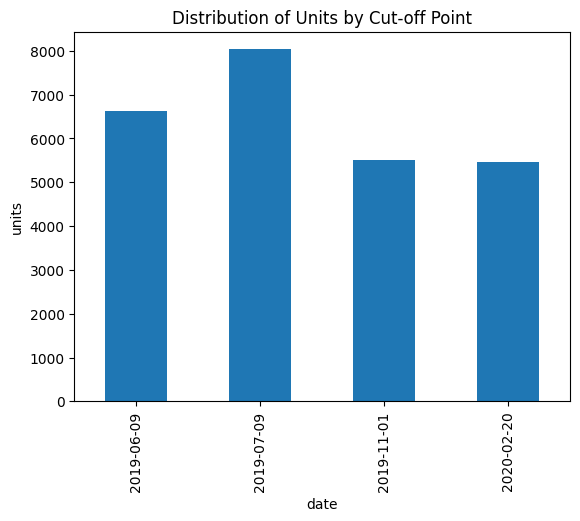

In [238]:
ax = df['date'].dt.strftime('%Y-%m-%d').value_counts() \
        .sort_index() \
        .plot(kind='bar', title='Distribution of Units by Cut-off Point', ylabel='units')

let's see the distribution of products by their subcategory

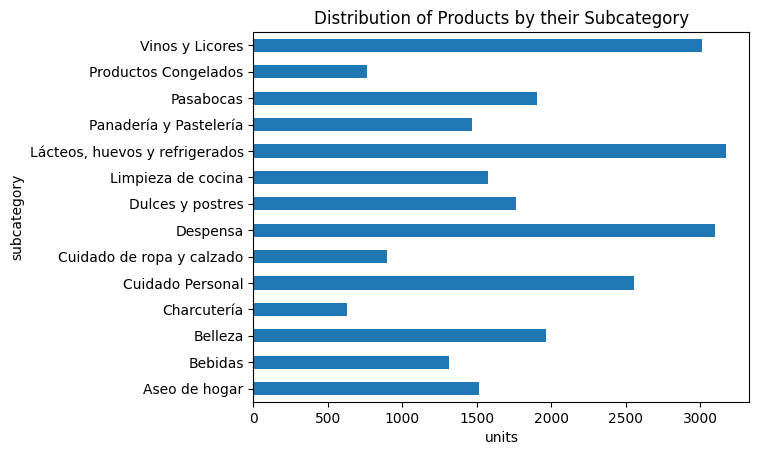

In [239]:
ax = df['subcategory'].value_counts() \
        .sort_index() \
        .plot(kind='barh', title='Distribution of Products by their Subcategory', xlabel='units')

## - top 5 categories with more products available

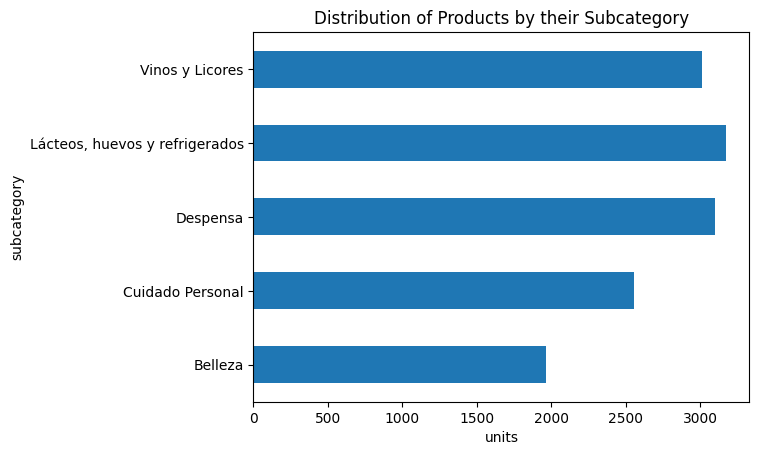

In [240]:
ax = df['subcategory'].value_counts() \
        .head(5) \
        .sort_index() \
        .plot(kind='barh', title='Distribution of Products by their Subcategory', xlabel='units')

Based on the distribution of units per category, we can obtain the general distribution of products according to their subcategory and the top 5 categories with the highest demand in the market.

In [241]:
df['subcategory'].unique()

array(['Aseo de hogar', 'Bebidas', 'Belleza', 'Charcutería',
       'Cuidado de ropa y calzado', 'Cuidado Personal', 'Despensa',
       'Dulces y postres', 'Lácteos, huevos y refrigerados',
       'Limpieza de cocina', 'Panadería y Pastelería', 'Pasabocas',
       'Productos Congelados', 'Vinos y Licores'], dtype=object)

In [242]:
def show_price_distribution(subcategory: str, 
                            top: int = 0, 
                            bottom: int = 0,
                            gap: int = 1000
                           ):
    df_filtered = df[df["subcategory"] == subcategory]

    if top!=0 or bottom!=0:
        avg_prices = df_filtered.groupby("tags")["prod_unit_price"].mean()
        
        tags_to_include = set()

        if top!=0:
            top_tags = avg_prices.nlargest(top).index
            tags_to_include.update(top_tags)
        
        if bottom!=0:
            bottom_tags = avg_prices.nsmallest(bottom).index
            tags_to_include.update(bottom_tags)
        
        df_filtered = df_filtered[df_filtered["tags"].isin(tags_to_include)]
    
    plt.figure(figsize=(12, 6))
    
    sns.lineplot(
        data=df_filtered, 
        x="date", 
        y="prod_unit_price", 
        hue="tags", 
        marker="o", 
        linewidth=1.5
    )
    
    plt.xticks(rotation=30, ha='right')
    special_plot_label = ''
    if top!=0:
        special_plot_label = f'Top {top} expensive '
    elif bottom!=0:
        special_plot_label = f'Bottom {bottom} cheap '
    plt.title(f"{special_plot_label}Price Evolution in: {subcategory}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Unit Price", fontsize=12)
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(ticker.MultipleLocator(gap))  
    
    plt.legend(title="Tags", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout(rect=[0, 0, 0.8, 1])  
    plt.show()

In [243]:
def show_distribution(subcategory: str, by: str, top: int = 0, bottom: int = 0):
    df_filtered = df[df['subcategory'] == subcategory][by]
    
    counts = df_filtered.value_counts() 
    
    special_plot_label = ''
    if top != 0:
        counts = counts.head(top)
        special_plot_label = f'Top {top} '
    elif bottom != 0:
        counts = counts.tail(bottom)
        special_plot_label = f'Bottom {bottom} '
    
    ax = counts.plot(
        kind='barh',
        title=f'{special_plot_label}Distribution of {by} by Subcategory: {subcategory}',
        xlabel='units'
    )
    plt.show()


# 3. Radiography of Top Subcategories

## - Lácteos, huevos y refrigerados

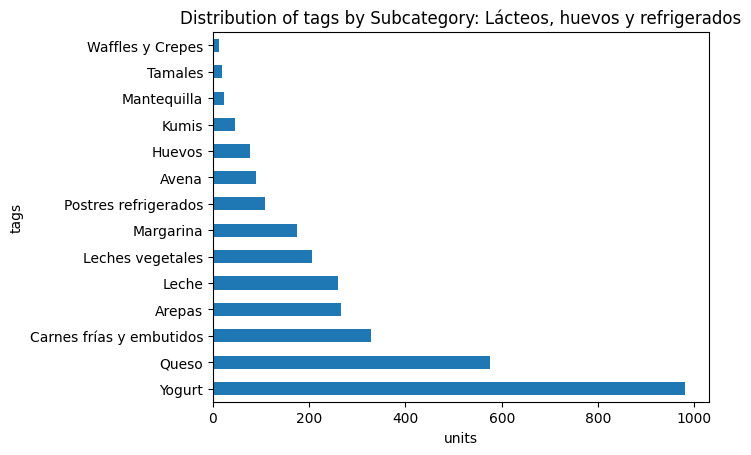

In [244]:
show_distribution('Lácteos, huevos y refrigerados', by='tags')

In [245]:
df[df['subcategory'] == 'Lácteos, huevos y refrigerados']['prod_brand'].count()

3173

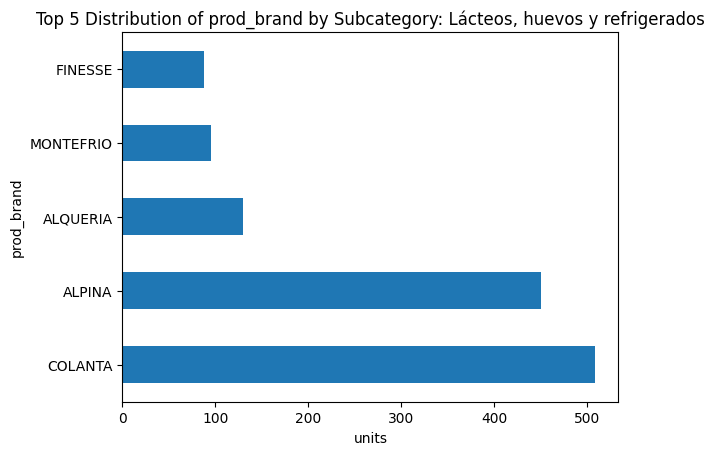

In [246]:
show_distribution('Lácteos, huevos y refrigerados', by='prod_brand', top=5)

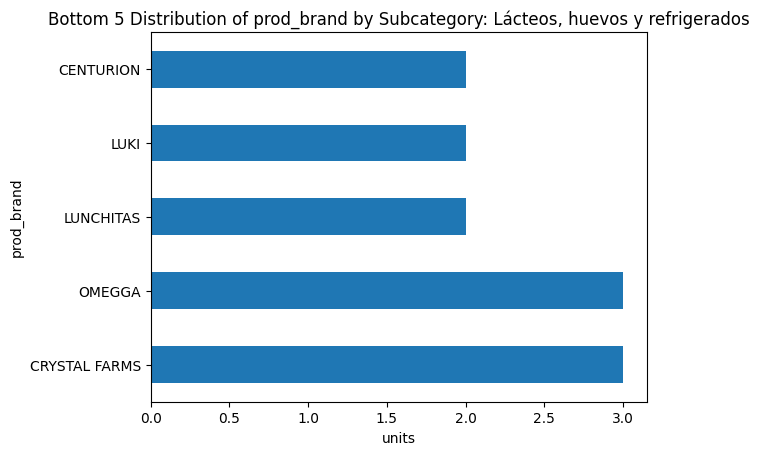

In [247]:
show_distribution('Lácteos, huevos y refrigerados', by='prod_brand', bottom=5)

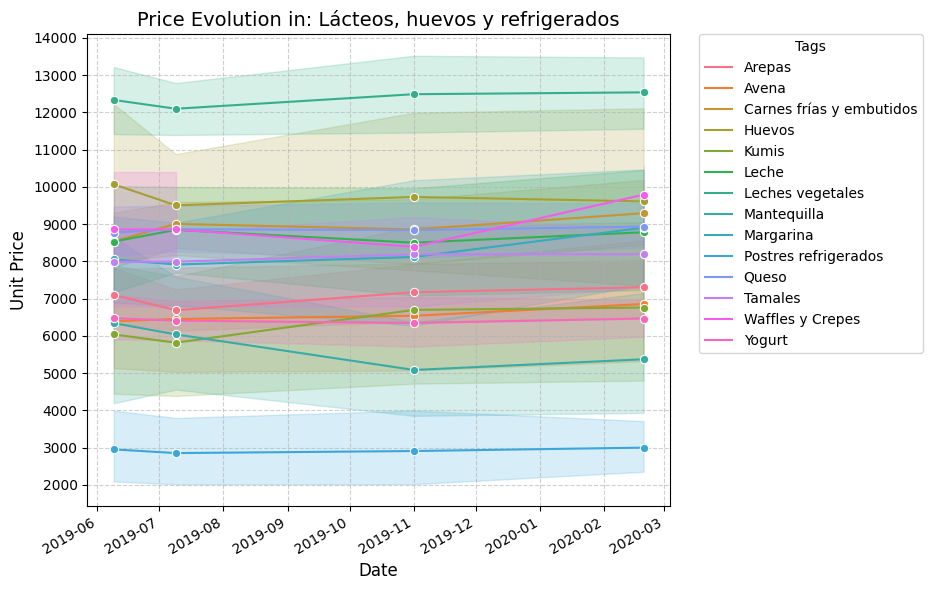

In [248]:
show_price_distribution('Lácteos, huevos y refrigerados')

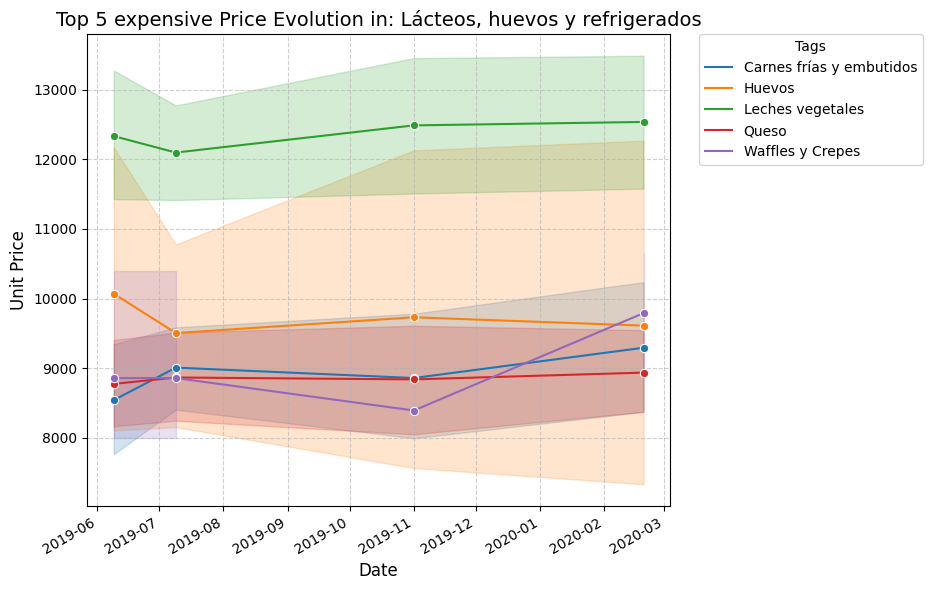

In [249]:
show_price_distribution('Lácteos, huevos y refrigerados', top=5)

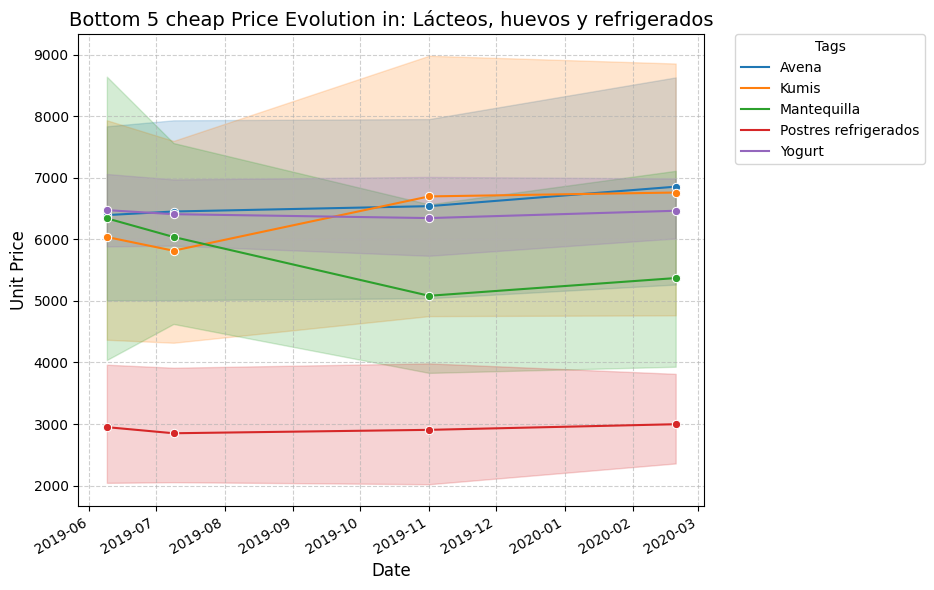

In [250]:
show_price_distribution('Lácteos, huevos y refrigerados', bottom=5)

### Analysis:

Several interesting findings can be drawn from these graphs:

## 1. **Top-Selling Products**  
   - **Yogurt** is by far the most popular item within “Dairy, Eggs, and Refrigerated” products, reaching almost 1000 units sold. **Cheese** and **Cold Cuts** follow as the next most prominent.  
   - The rest (Arepas, Milk, Plant-Based Milk, etc.) show lower but still relevant sales volumes within the category.

## 2. **Leading Brands**  
   - **COLANTA** and **ALPINA** clearly stand out in terms of units sold (around 500 and 450, respectively). **ALQUERÍA**, **MONTEFRÍO**, and **FINESSE** appear further down.  
   - At the bottom of the sales distribution (the brands with the lowest movement) are **CRYSTAL FARMS**, **OMEGGA**, **LUNCHITAS**, **LUKI**, and **CENTURION**, each with volumes around 2–3 units.

## 3. **Highest-Priced Products (Top 5)**  
   - **Plant-Based Milk** consistently remains the most expensive product (between 12,000 and 13,000 pesos over the period).  
   - Next are **Cold Cuts**, **Eggs**, **Cheese**, and **Waffles/Crepes**, mostly ranging between 9,000 and 10,000 pesos.  
   - There is a generally stable or slightly upward trend overall, with small fluctuations in Eggs and Cold Cuts.

## 4. **Lowest-Priced Products (Bottom 5)**  
   - **Refrigerated Desserts** are by far the cheapest items (around 2,000–3,000 pesos).  
   - **Yogurt**, **Oat Beverage**, **Kumis**, and **Butter** remain in a mid-low range (between 4,000 and 8,000 pesos), though with variations: for instance, Oat Beverage starts off quite expensive in 2019-06, drops notably by 2019-09, then rises again around 2020; Kumis and Butter show a slight increase over time.

## 5. **Overall Price Trends (2019-06 to 2020-03)**  
   - In general, the category does not show abrupt price changes, rather moderate fluctuations.  
   - **Plant-Based Milk** shows the most pronounced upward trend (from around 12,000 to 13,000 pesos).  
   - Some “mid-range” products (Cheese, Eggs, Arepas, Waffles/Crepes) exhibit a slight upward trend as well.  
   - The cheapest products (Refrigerated Desserts) remain very low and stable in price.

In summary, **Yogurt** is the top-selling product, **COLANTA** and **ALPINA** are the leading brands, and **Plant-Based Milk** stands out for its relatively high and increasing price. These insights suggest opportunities for Yogurt (high demand but possibly tighter margins), Plant-Based Milk (high, potentially growing price point), and for smaller brands that still have low market penetration.

## - Despensa

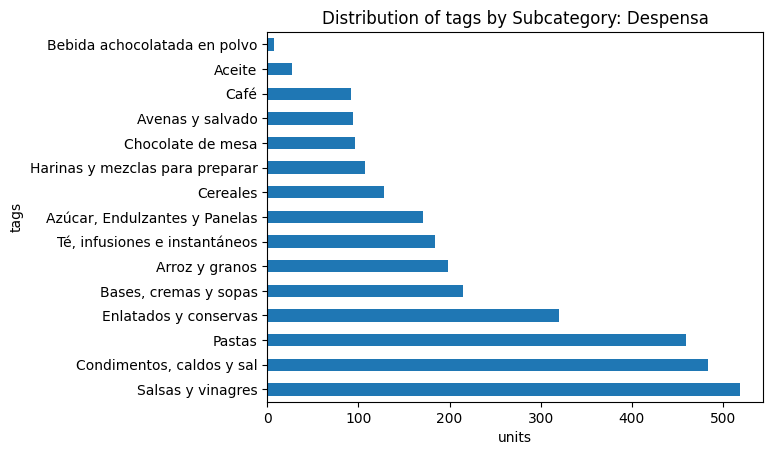

In [251]:
show_distribution('Despensa', by='tags')

In [252]:
df[df['subcategory']=='Despensa']['prod_brand'].count()

3100

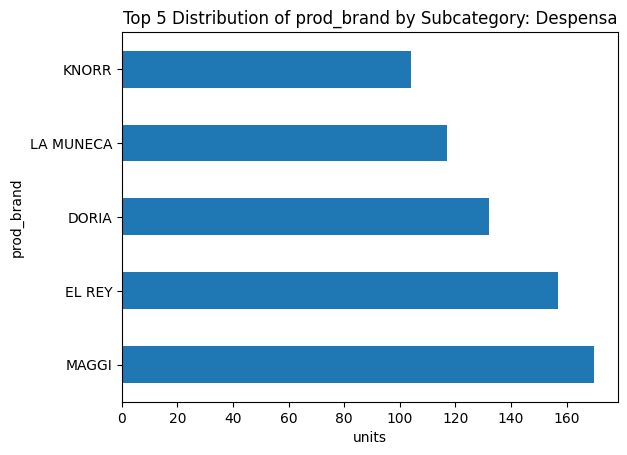

In [253]:
show_distribution('Despensa', by='prod_brand', top=5)

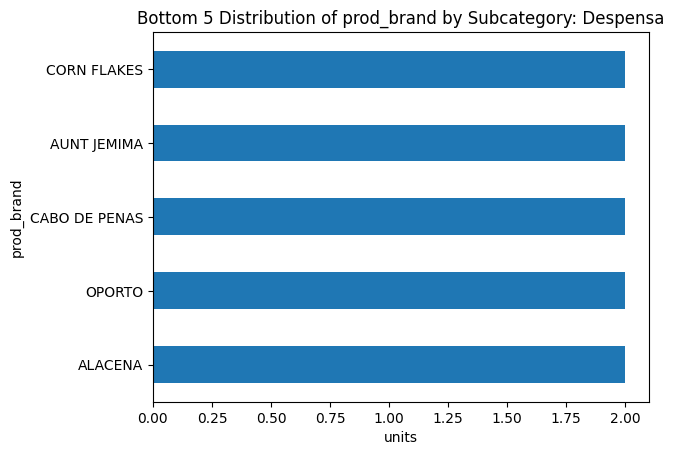

In [254]:
show_distribution('Despensa', by='prod_brand', bottom=5)

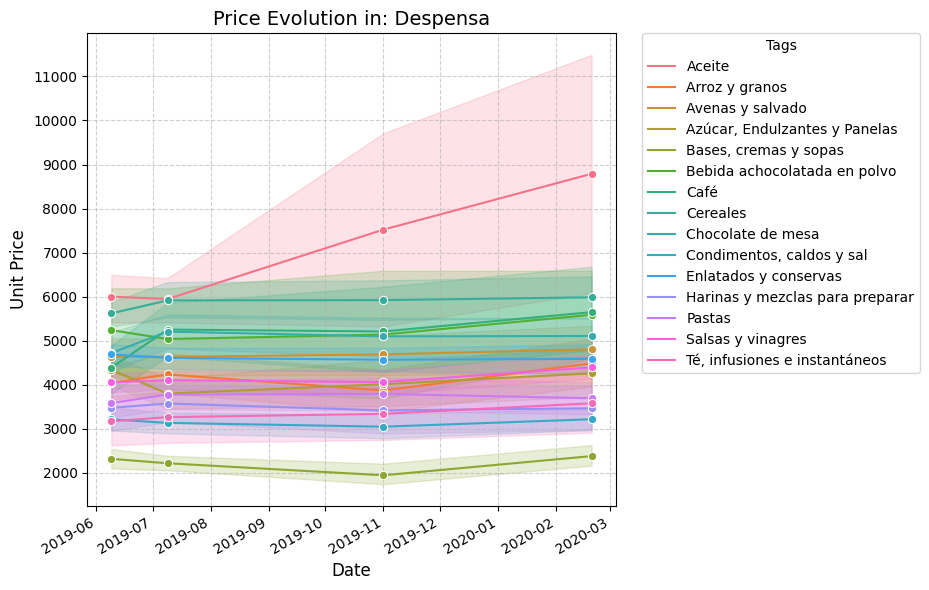

In [255]:
show_price_distribution('Despensa')

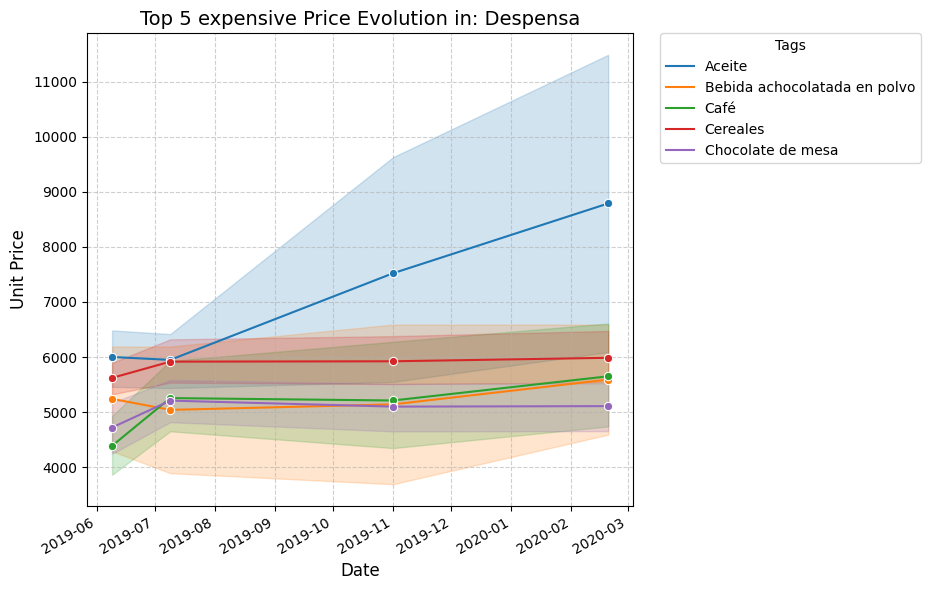

In [256]:
show_price_distribution('Despensa', top=5)

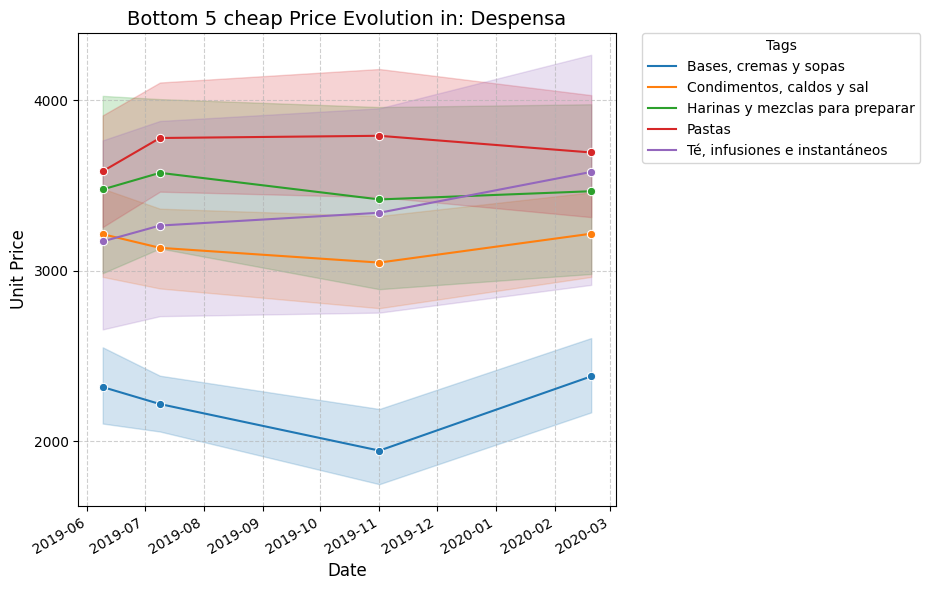

In [257]:
show_price_distribution('Despensa', bottom=5)

### Analysis:

Several interesting findings can be drawn from these graphs:

## 1. Best-Selling Subcategories
   - **Sauces and Vinegars** clearly leads with around 500 units sold.  
   - Next are **Seasonings, Broths, and Salt**, **Pasta**, **Canned Goods and Preserves**, and **Bases, Creams, and Soups**, each exceeding 200 units.  
   - Other subcategories such as **Rice and Grains**, **Tea, Infusions, and Instant Beverages**, and **Sugar, Sweeteners, and Panela** fall into a mid-range (roughly 150–200 units).  
   - At the lower end, with fewer units sold, are **Oil** and **Powdered Chocolate Beverage**.

## 2. Leading Brands
   - The top five brands are **MAGGI**, **EL REY**, **DORIA**, **LA MUÑECA**, and **KNORR**, listed in approximate descending order of units sold.  
   - In contrast, **CORN FLAKES**, **AUNT JEMIMA**, **CABO DE PEÑAS**, **OPORTO**, and **ALACENA** have the lowest sales (around 1–2 units each).

## 3. Highest-Priced Products (Top 5)
   - **Oil** shows a very pronounced increase over the period, rising from around 6,000 pesos in June 2019 to over 11,000 pesos by March 2020, making it the most expensive product.  
   - **Powdered Chocolate Beverage** also sees a notable increase (from about 5,000 to around 8,000 pesos).  
   - **Coffee**, **Breakfast Cereals**, and **Hot Chocolate Bars** start in the 4,500–5,000 peso range and climb moderately toward the end (between 5,000 and 6,000 pesos).

## 4. Lowest-Priced Products (Bottom 5)
   - **Bases, Creams, and Soups** remain the cheapest, initially around 2,000 pesos, dipping near 1,600 at one point, then rebounding to roughly 2,500 pesos by March 2020.  
   - **Seasonings, Broths, and Salt**, **Flours and Mixes**, **Pasta**, and **Tea, Infusions, and Instant Beverages** lie in a mid-low range (3,000–4,500 pesos), with a slight upward trend over these months.

## 5. Overall Price Trends (June 2019 to March 2020) 
   - **Oil** and, to a lesser degree, **Powdered Chocolate Beverage** show significant price increases.  
   - Most other products display more gradual increases, without abrupt changes.  
   - The lower-priced categories (e.g., **Bases, Creams, and Soups**) drop slightly in some months but end up somewhat higher than their starting point, indicating a moderate price rebound.

## Conclusions 
- **Sauces and Vinegars** has the highest demand, suggesting strong turnover and market opportunity.  
- **Oil** stands out due to its marked price surge, possibly reflecting cost pressures or higher perceived value.  
- **Bases, Creams, and Soups** remains the most economical option in the pantry category, though its price also trends upward toward the end of the period.

## - Vinos y Licores

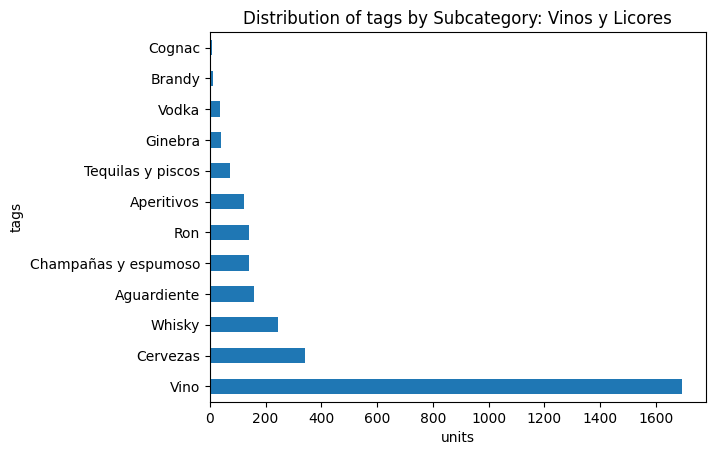

In [258]:
show_distribution('Vinos y Licores', by='tags')

In [259]:
df[df['subcategory']=='Vinos y Licores']['prod_brand'].count()

3013

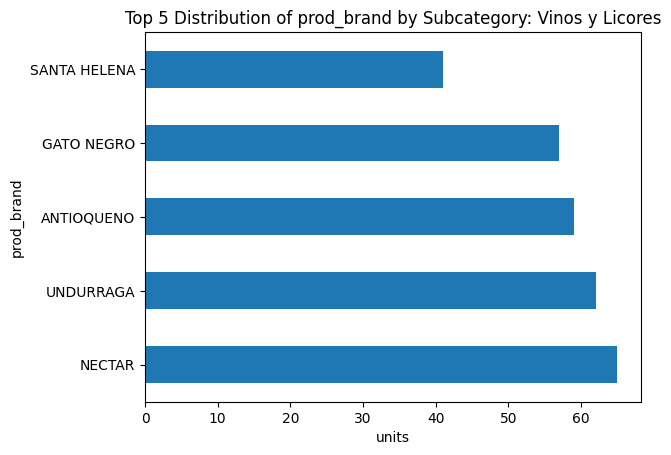

In [260]:
show_distribution('Vinos y Licores', by='prod_brand', top=5)

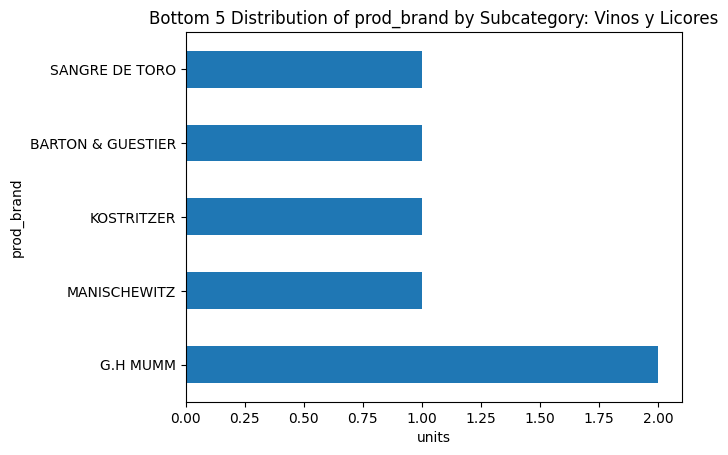

In [261]:
show_distribution('Vinos y Licores', by='prod_brand', bottom=5)

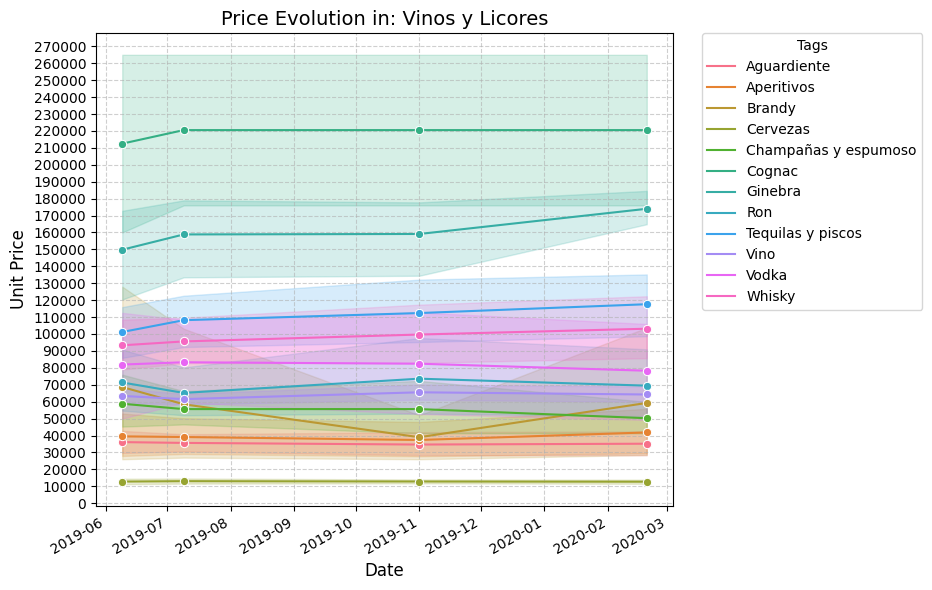

In [262]:
show_price_distribution('Vinos y Licores', gap=10000)

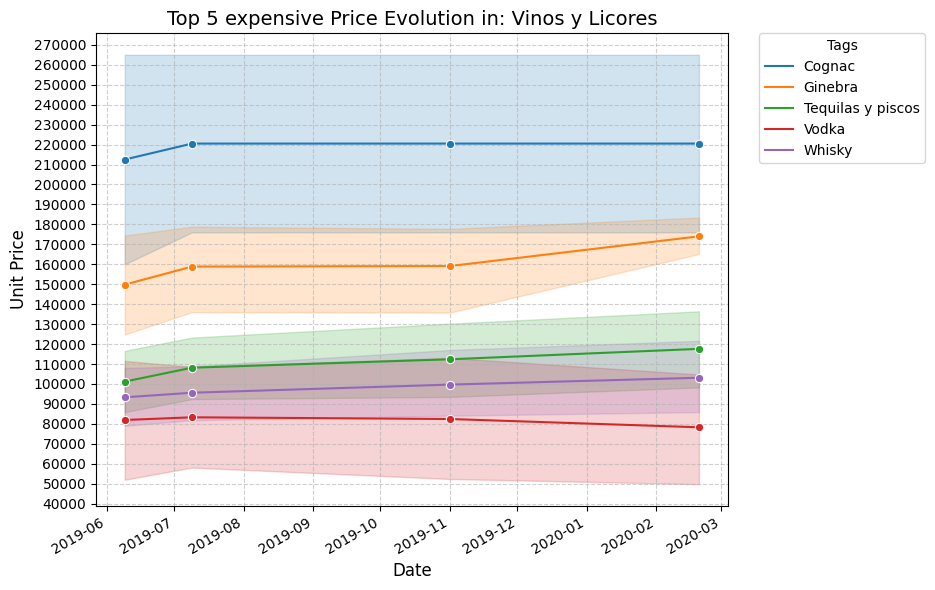

In [263]:
show_price_distribution('Vinos y Licores', top=5, gap=10000)

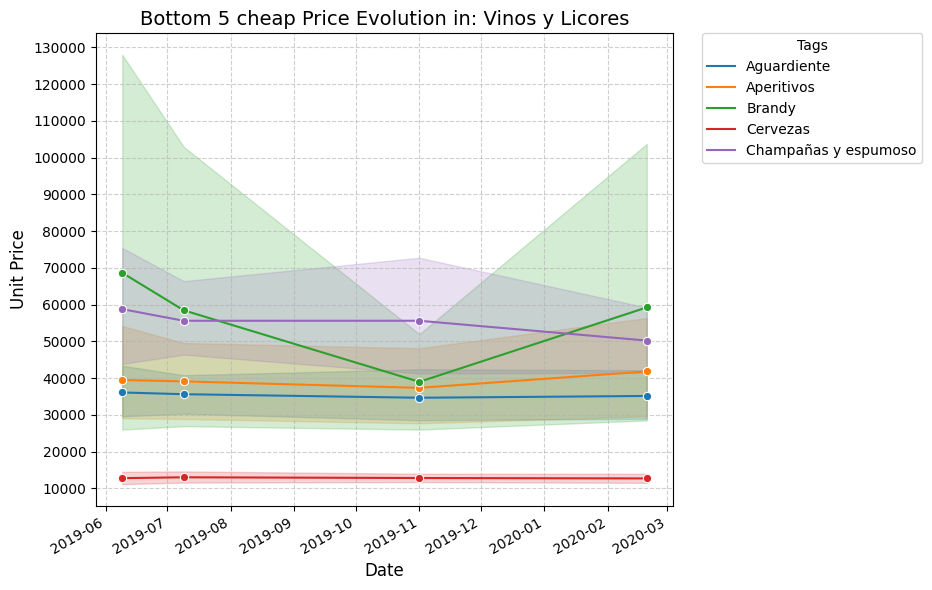

In [264]:
show_price_distribution('Vinos y Licores', bottom=5, gap=10000)

### Analysis:

## 1. Top-Selling Products
- **Wine** is the dominant product, with around 1,600 units sold.  
- **Beer** ranks second at approximately 200 units, followed by **Whiskey** with around 100.  
- **Aguardiente** and **Champagne/Sparkling** stand at roughly 50–60 units each, then **Rum**, **Aperitifs**, **Tequilas/Piscos**, **Gin**, **Vodka**, **Brandy**, and **Cognac** in decreasing order.  
- **Cognac** and **Brandy** record the lowest sales volumes (fewer than 10 units sold).

## 2. Leading Brands
- The top five brands by units sold are **NECTAR**, **UNDURRAGA**, **ANTIOQUEÑO**, **GATO NEGRO**, and **SANTA HELENA** (from highest to lowest).  
- In contrast, **G.H MUMM**, **MANISCHEWITZ**, **KOSTRITZER**, **BARTON & GUESTIER**, and **SANGRE DE TORO** show the fewest sales (1–2 units each).

## 3. Highest-Priced Products (Top 5)
1. **Cognac**: The most expensive, ranging from around 210,000–220,000 pesos in mid-2019 and rising to around 260,000 pesos by early 2020.  
2. **Gin**: A close second, typically 130,000–170,000 pesos, with a steady upward trend over the same period.  
3. **Tequilas/Piscos**: Prices remain below Cognac and Gin, usually under 120,000 pesos, with mild increases.  
4. **Vodka**: Generally 70,000–90,000 pesos, experiencing small fluctuations but no dramatic jumps.  
5. **Whiskey**: Also 70,000–90,000 pesos, with modest upward movement.

## 4. Lowest-Priced Products (Bottom 5)
1. **Beer**: Consistently the cheapest, ranging roughly from 9,000 to 12,000 pesos.  
2. **Aguardiente**: Averages around 30,000–40,000 pesos, showing minor price fluctuations.  
3. **Aperitifs**: Similar range to Aguardiente, with modest changes over time.  
4. **Brandy**: Sits higher at 50,000–60,000 pesos, briefly dipping mid-period but rising again by early 2020.  
5. **Champagne/Sparkling**: Moves between 50,000 and 80,000 pesos, dipping to the mid-50,000 range in late 2019 then climbing above 70,000 by March 2020.

## 5. Overall Price Trends (June 2019 to March 2020)
- **Cognac** stands out with a very high and steadily rising price, reinforcing its premium positioning.  
- Other liquors, such as **Gin**, **Tequilas/Piscos**, and **Whiskey**, exhibit incremental increases without abrupt spikes.  
- **Beer** remains at the bottom of the price spectrum and shows minimal movement, making it the most budget-friendly option.

## Conclusions
- **Wine** dominates in sales volume, reflecting a strong consumer preference.  
- **Cognac** demonstrates the highest price point, signaling a niche, premium market.  
- Brands like **NECTAR** and **UNDURRAGA** lead in overall product movement, while specialized or import brands such as **G.H MUMM** and **BARTON & GUESTIER** move relatively fewer units.  
- **Beer** is the lowest-priced product, potentially appealing to a broader consumer base, while **Gin** and **Cognac** cater to more premium segments.

## - Cuidado Personal

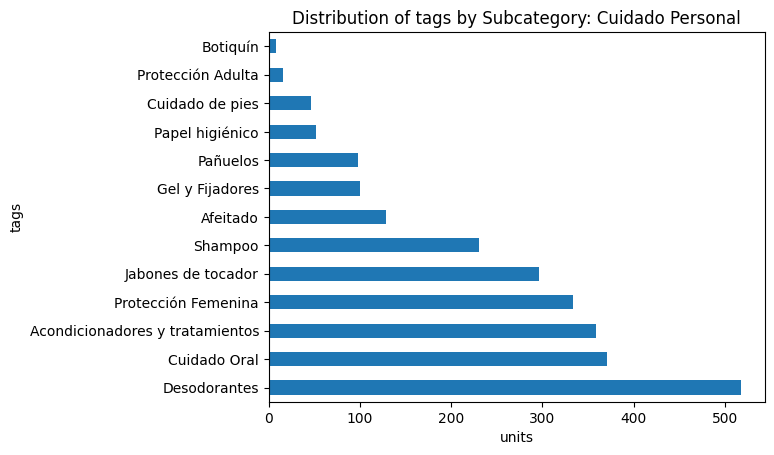

In [265]:
show_distribution('Cuidado Personal', by='tags')

In [266]:
df[df['subcategory']=='Cuidado Personal']['prod_brand'].count()

2558

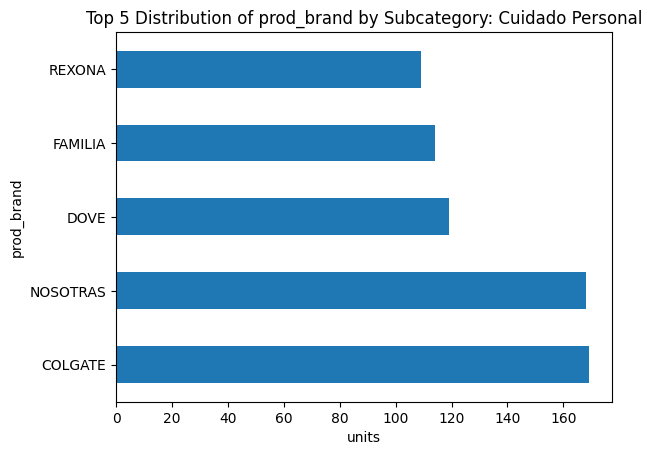

In [267]:
show_distribution('Cuidado Personal', by='prod_brand', top=5)

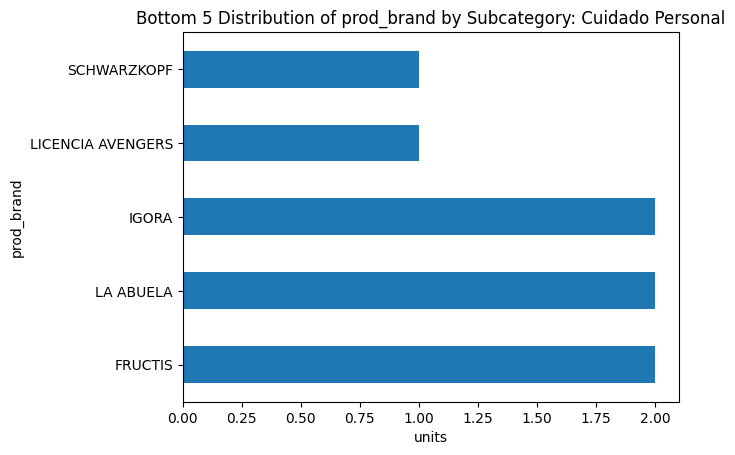

In [268]:
show_distribution('Cuidado Personal', by='prod_brand', bottom=5)

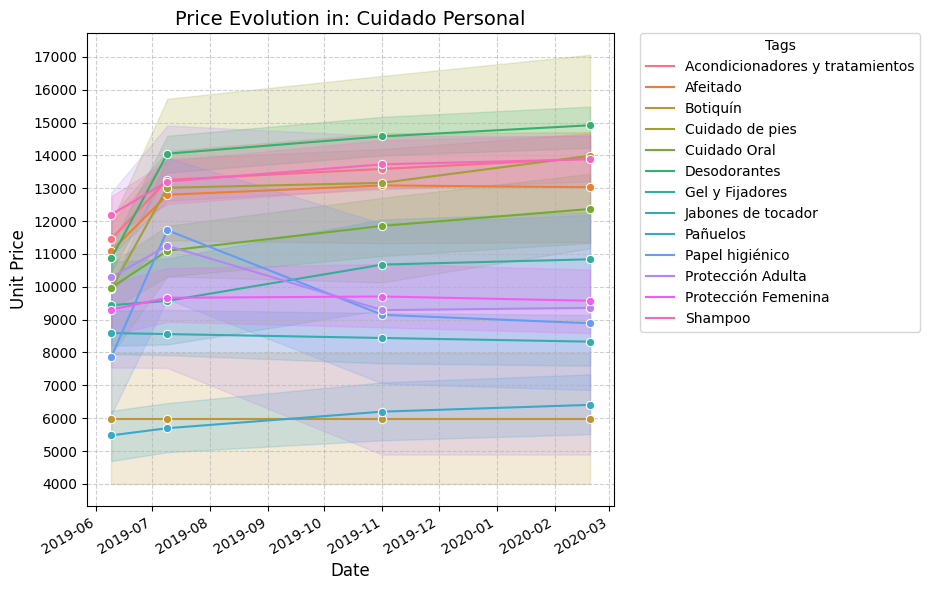

In [269]:
show_price_distribution('Cuidado Personal')

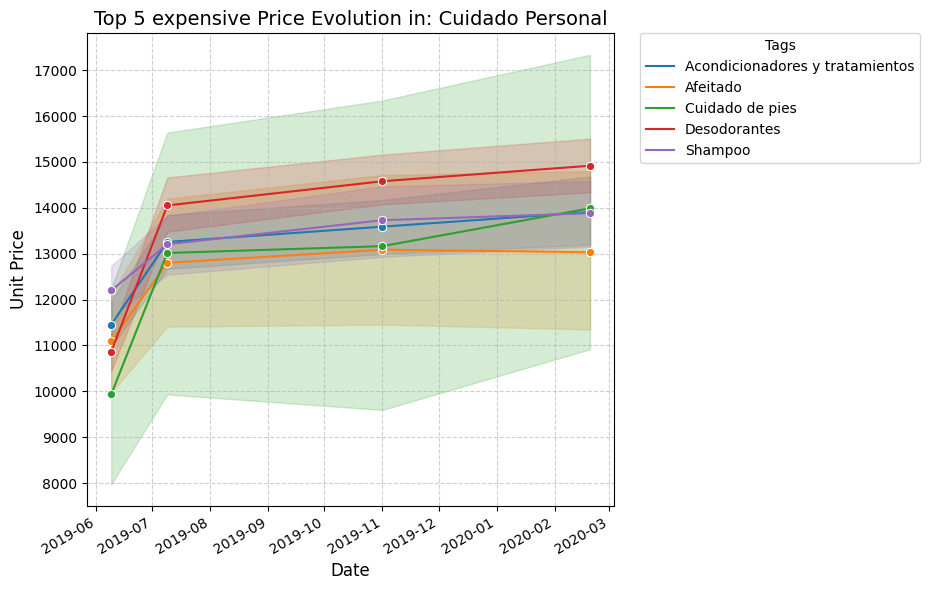

In [270]:
show_price_distribution('Cuidado Personal', top=5)

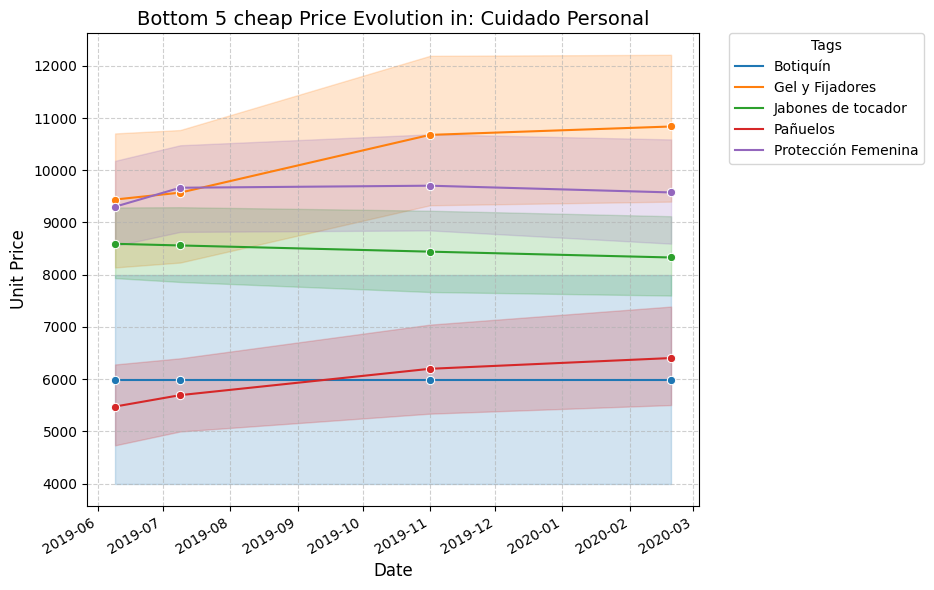

In [271]:
show_price_distribution('Cuidado Personal', bottom=5)

### Analysis

## 1. Top-Selling Products
- **Deodorants** lead in sales volume, reaching around 500 units.  
- **Oral Care** follows with roughly 400 units, then **Conditioners and Treatments** (~300 units), **Feminine Protection** (~250), **Toilet Soaps** (~200), and **Shampoo** (~150).  
- Subcategories such as **Shaving**, **Hair Gels/Fixatives**, **Tissues**, and **Foot Care** fall into a mid‐to‐low range, while **Adult Protection** and **First‐Aid Kits (Botiquín)** register the fewest units sold.

## 2. Leading Brands
- The top five brands are **COLGATE** (the highest, ~160 units), **NOSOTRAS** (~140), **DOVE** (~100), **REXONA** (~110), and **FAMILIA** (~90).  
- At the lower end, with minimal sales (around 1–2 units each), are **FRUCTIS**, **LA ABUELA**, **IGORA**, **LICENCIA AVENGERS**, and **SCHWARZKOPF**.

## 3. Highest-Priced Products (Top 5)
1. **Conditioners and Treatments**: Prices jump from roughly 10,000–11,000 pesos in mid‐2019 to around 15,000–16,000 by early 2020.  
2. **Shaving**: Moves in a similar range (12,000–15,000 pesos), showing a clear upward trend.  
3. **Foot Care**: Rises from around 9,000–10,000 pesos to ~13,000 pesos, with occasional dips.  
4. **Deodorants**: Stabilize at roughly 14,000 pesos, after an initial surge.  
5. **Shampoo**: Goes from around 11,000–12,000 pesos to the 13,000 range by early 2020.

## 4. Lowest-Priced Products (Bottom 5)
1. **First‐Aid Kits (Botiquín)**: Consistently the cheapest, increasing from around 5,000–6,000 pesos in mid‐2019 to ~9,000 by 2020‐03.  
2. **Hair Gels and Fixatives**: Range from ~8,000 to ~10,000 pesos, generally rising over time.  
3. **Toilet Soaps**: Move between 9,000 and 10,500 pesos.  
4. **Tissues (Pañuelos)**: From ~7,000 to ~9,000 pesos, with minor fluctuations.  
5. **Feminine Protection**: Around 9,000 pesos initially, trending slightly upward (to about 9,500 pesos) by early 2020.

## 5. Overall Price Trends (June 2019 to March 2020)
- Nearly all subcategories show a notable jump from June to July 2019, then moderate growth or flattening thereafter.  
- **Conditioners and Treatments** remain the most expensive category, hovering around 15,000–16,000 pesos by the end.  
- **First‐Aid Kits** are consistently the cheapest, despite a gradual price increase through the period.

## Conclusions
- **Deodorants** dominate sales volume, suggesting strong consumer demand in that category.  
- **COLGATE** emerges as the top‐selling brand, followed by **NOSOTRAS**, **DOVE**, **REXONA**, and **FAMILIA**.  
- **Conditioners and Treatments** claim the highest price point, while **First‐Aid Kits** remain the most budget‐friendly option.  
- Overall, the category exhibits an initial price surge mid‐2019, then steadier, modest increases toward early 2020.

## - Belleza

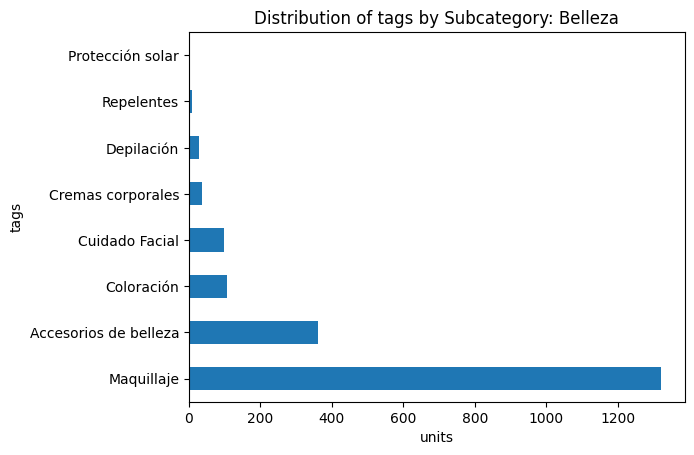

In [272]:
show_distribution('Belleza', by='tags')

In [273]:
df[df['subcategory']=='Belleza']['prod_brand'].count()

1963

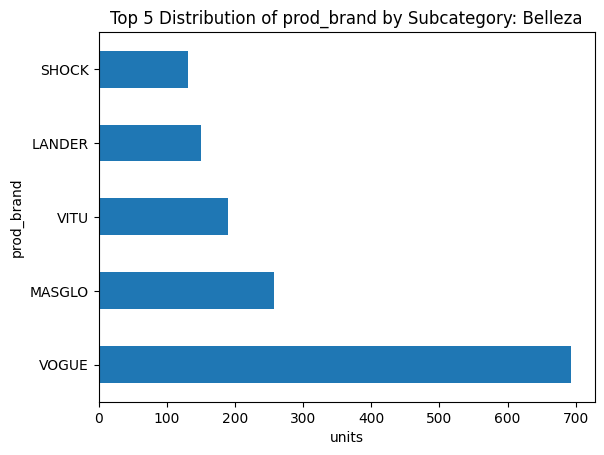

In [274]:
show_distribution('Belleza', by='prod_brand', top=5)

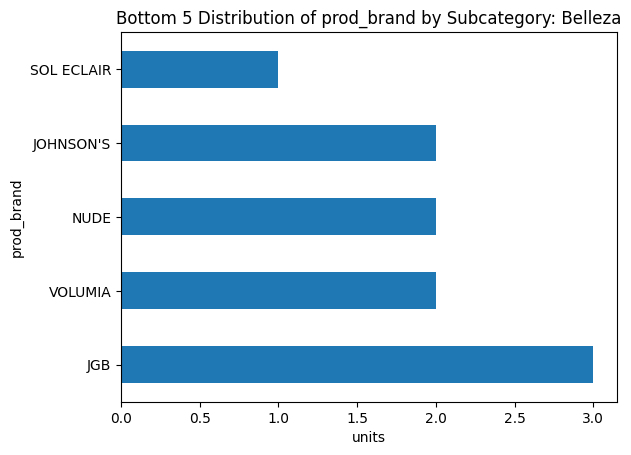

In [275]:
show_distribution('Belleza', by='prod_brand', bottom=5)

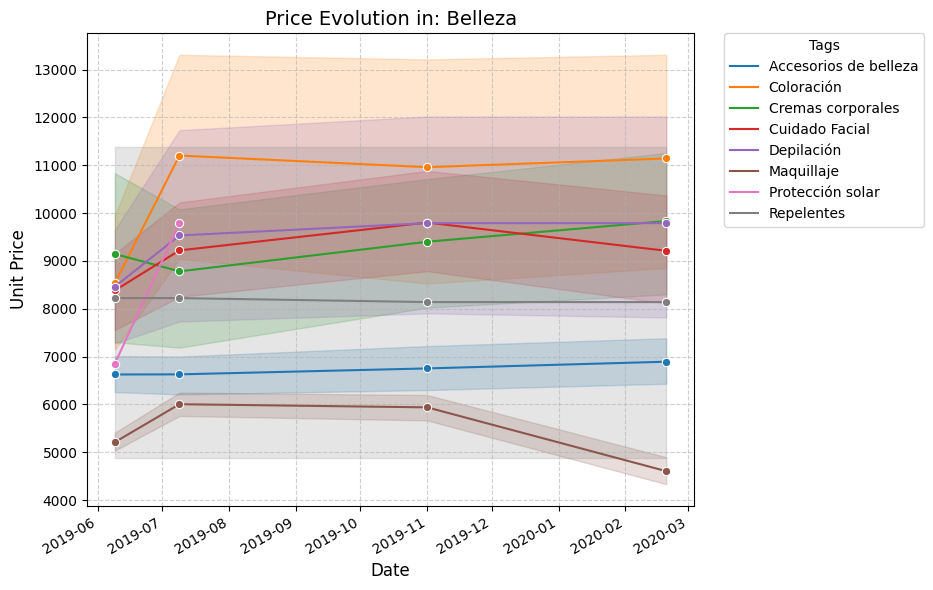

In [276]:
show_price_distribution('Belleza')

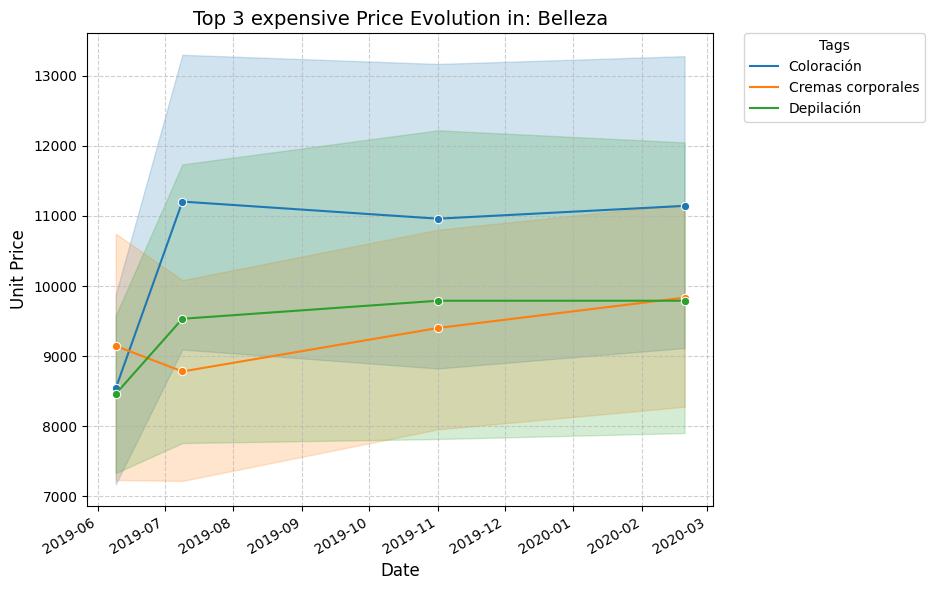

In [277]:
show_price_distribution('Belleza', top=3)

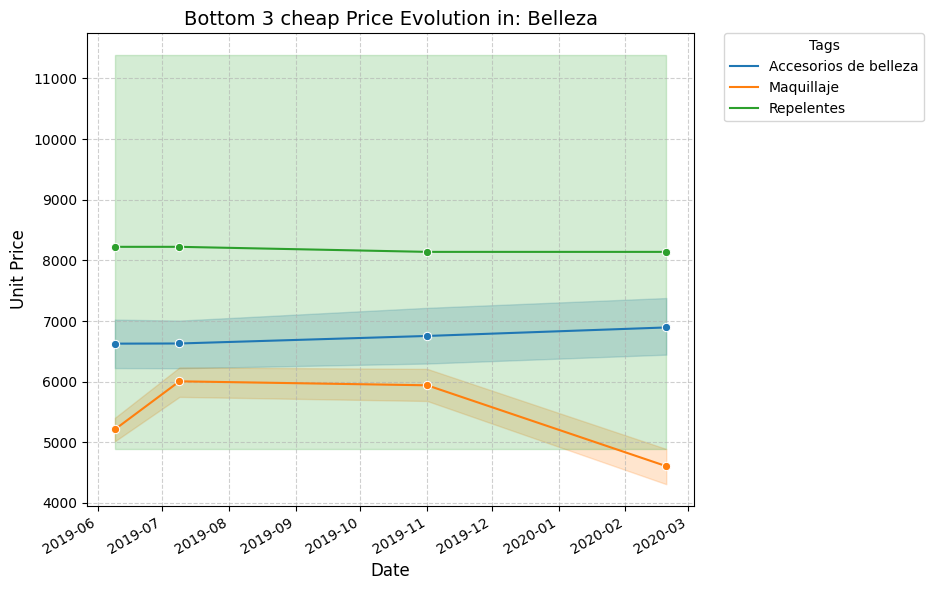

In [278]:
show_price_distribution('Belleza', bottom=3)

### Analysis

## 1. Top-Selling Products
- **Makeup** is by far the most popular, with around 1,200 units sold.  
- **Beauty Accessories** follow at roughly 200 units.  
- **Hair Coloring** (~80), **Facial Care** (~60), **Body Creams** (~40), **Hair Removal** (~30), **Repellents** (~10), and **Sun Protection** (fewer than 10) round out the subcategory.

## 2. Leading Brands
- **VOGUE** tops the list with close to 700 units.  
- **MASGLO** follows (~200–300), then **VITU** (~150), **LANDER** (~100–120), and **SHOCK** (~100) occupy the next slots.  
- At the lower end, **JGB**, **VOLUMIA**, **NUDE**, **JOHNSON’S**, and **SOL ECLAIR** each register just 1–3 units sold.

## 3. Highest-Priced Products
From the main price chart, two items show particularly high or rising prices:  
1. **Hair Coloring**: Climbs from about 10,000–11,000 pesos in mid‐2019 to ~13,000 pesos by early 2020.  
2. **Sun Protection**: Surges from ~6,000 pesos to over 12,000 in 2019‐08, then settles around 9,000 by 2020‐03.  
3. **Facial Care**: Averages 9,000–10,000 pesos, with a modest upward trend.  
4. **Hair Removal**: Moves in the 8,000–9,500 peso range, rising slightly over time.  
5. **Body Creams**: Rises from around 7,500 pesos to ~9,500 pesos, showing steady growth.

## 4. Lowest-Priced Products
A look at the “Bottom 3 cheap” chart highlights:  
1. **Makeup**: Although it begins near 7,000–8,000 pesos, it drops to around 5,000 pesos by early 2020, making it the least expensive by the end.  
2. **Beauty Accessories**: Range from ~7,000 to ~8,000 pesos, with a gradual upward trend.  
3. **Repellents**: Hover around 7,500–8,000 pesos, dipping slightly toward 7,000 pesos by 2020‐03.

## 5. Overall Price Trends (June 2019 to March 2020)
- Most categories jump between June and August 2019, especially **Hair Coloring** and **Sun Protection**.  
- **Makeup** experiences a notable price decline after its mid‐2019 peak.  
- **Repellents** and **Beauty Accessories** remain fairly stable, while **Facial Care**, **Body Creams**, and **Hair Removal** follow gentle upward trends.

## Conclusions
- **Makeup** is the clear sales leader, indicating strong consumer demand in cosmetics.  
- **VOGUE** emerges as the dominant brand within Beauty, significantly outpacing others.  
- **Hair Coloring** and **Sun Protection** command higher price points overall, whereas **Makeup** ends up the most budget‐friendly option by early 2020.  
- Price dynamics suggest that after an initial surge for most items around mid‐2019, many categories either stabilize or show moderate upward or downward shifts over the subsequent months.


# 4. Inventory value by category

In [279]:
inventory_value = df.groupby('subcategory')['prod_unit_price'].sum()
inventory_value    

subcategory
Aseo de hogar                     1.756772e+07
Bebidas                           6.843216e+06
Belleza                           1.237779e+07
Charcutería                       2.056517e+07
Cuidado Personal                  2.910031e+07
Cuidado de ropa y calzado         1.175681e+07
Despensa                          1.220442e+07
Dulces y postres                  1.430283e+07
Limpieza de cocina                1.268324e+07
Lácteos, huevos y refrigerados    2.482807e+07
Panadería y Pastelería            1.235131e+07
Pasabocas                         1.495719e+07
Productos Congelados              1.469434e+07
Vinos y Licores                   1.831300e+08
Name: prod_unit_price, dtype: float64

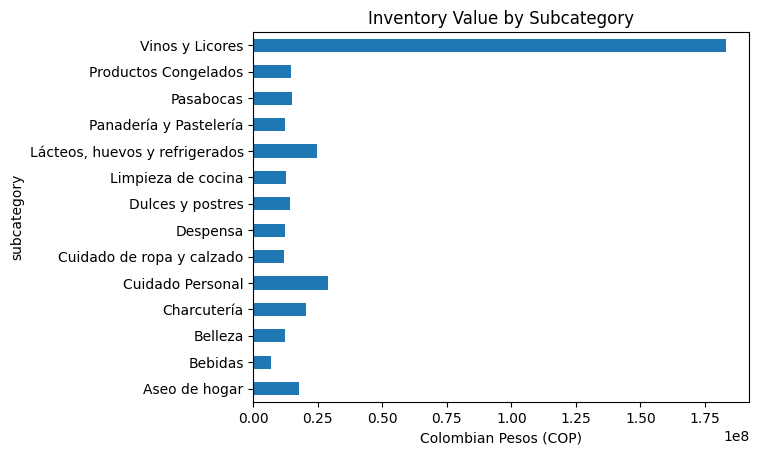

In [280]:
ax = inventory_value \
        .sort_index() \
        .plot(kind='barh', title='Inventory Value by Subcategory', xlabel='Colombian Pesos (COP)')

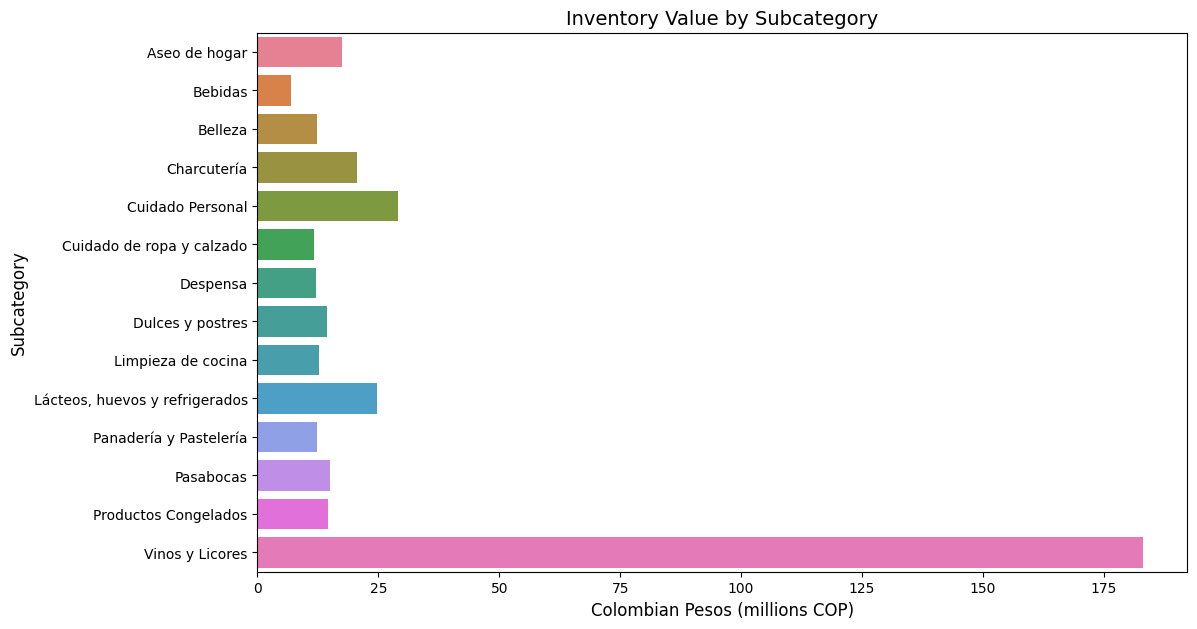

In [281]:
inventory_value_millions = inventory_value / 1e6

df_plot = inventory_value_millions.reset_index()
df_plot.columns = ['subcategory', 'inventory_value_millions']

plt.figure(figsize=(12, 7))

sns.barplot(
    data=df_plot, 
    y='subcategory', 
    x='inventory_value_millions', 
    palette='husl'
)

plt.title('Inventory Value by Subcategory', fontsize=14)
plt.xlabel('Colombian Pesos (millions COP)', fontsize=12)
plt.ylabel('Subcategory', fontsize=12)

plt.show()

# 5. Final Conclusion and Key Insights

After compiling all the subcategory analyses (sales volumes, prices, leading brands) and complementing them with the distribution of units over various dates and total inventory value charts, we arrive at the following overarching insights:

1. **Inventory Size and Value by Category**  
   - **Wines & Liquors** stands out not only for its number of products (over 3,000 units) but also for the highest inventory value, at around 180 million COP. This signals both significant demand and higher price points, translating into a substantial share of overall revenue potential.  
   - **Dairy, Eggs, and Refrigerated**, including the top‐selling product (Yogurt), shows the second‐highest inventory value and a broad portfolio (over 2,500 units). This category also displayed rising prices in premium segments (e.g., plant‐based milk).

2. **Other High‐Volume Categories**  
   - **Pantry (Despensa)** and **Personal Care** each hover around 2,000 and 1,600 units, respectively, placing them in the mid‐range for inventory value. Pantry includes items like sauces, vinegars, and oils (some with notable price increases), while Personal Care leads in deodorants, followed by oral hygiene products.  
   - **Beauty**, although having a smaller total inventory value, features dynamic segments such as makeup (over 1,200 units sold) and strong leading brands (e.g., VOGUE) with relatively accessible price points.

3. **Unit Distribution Over Time**  
   - The “cut‐off date” chart (June 2019–Feb 2020) shows a peak of over 8,000 units in July 2019, followed by gradual decreases in November 2019 and February 2020. This pattern may reflect seasonal factors or shifts in commercial strategy affecting total product volume or sales.

4. **Price Dynamics**  
   - Multiple categories (e.g., Wines & Liquors, Pantry, Beauty) experienced price increases from mid‐2019, especially in premium items (Cognac, oil, certain sunscreens, hair colorings).  
   - In contrast, high‐volume products such as Yogurt or makeup showed relatively stable or even declining prices, which can encourage broader adoption.

5. **Leading Brands**  
   - In Dairy, **Colanta** and **Alpina** excel; in Wines & Liquors, both local and foreign labels (e.g., **Nectar**, **Undurraga**) show varied positioning; while in Personal Care and Beauty, major players include **Colgate**, **Nosotras**, **Vogue**, **Masglo**, among others.  
   - Niche or lower‐selling imports appear with minimal presence, underscoring potential market specialization or limited consumer recognition.

6. **Strategic Recommendations**  
   - **Optimize Inventories:** Given Wines & Liquors’ high inventory value, closely monitor turnover and margins, balancing adequate stock levels with the high carrying cost of premium items.  
   - **Strengthen Mid‐Value, Mid‐Volume Categories:** Pantry, Personal Care, Beauty, and Dairy provide stable sales; refining assortment and promotional campaigns could further boost their share.  
   - **Monitor Premium Pricing:** Cognac, plant‐based milk, specialty oils, and higher‐end beauty treatments carry high margins but may see more volatile demand.  
   - **Leverage Seasonality:** Declines in total units in late 2019 and early 2020 suggest seasonal or cyclical patterns; tailor campaigns and inventory to peak buying seasons.

In summary, **most revenue** stems from a **balance** between high‐value categories (Wines & Liquors, Dairy) and those with large volumes or steady growth (Pantry, Personal Care, Beauty). By making data‐driven decisions regarding **margins, turnover, and inventory investment**, the organization can sustain profitability and adapt to demand fluctuations throughout the year.